<a href="https://colab.research.google.com/github/Seanzhengocean1/temp_P/blob/main/AirBNB_Project_0705_version2a_submit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('/content/AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [5]:

df = df.drop(['last_review', 'name'], axis=1)
df = df.dropna(subset=['host_name'])
mean_reviews_per_month = df['reviews_per_month'].mean()
df['reviews_per_month'].fillna(mean_reviews_per_month, inplace=True)
df.fillna(df.mean(), inplace=True)


KeyError: ignored

In [6]:
df.head()

,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.210000,6,365
1,2595,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.380000,2,355
2,3647,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1.373041,1,365
3,3831,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.640000,1,194
4,5022,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.100000,1,0


In [7]:
from numpy import product
# Task 1: Calculate How many properties in each neighbour hood group
property_count = df['neighbourhood_group'].value_counts()
property_count

Manhattan        21652
Brooklyn         20095
Queens            5664
Bronx             1090
Staten Island      373
Name: neighbourhood_group, dtype: int64

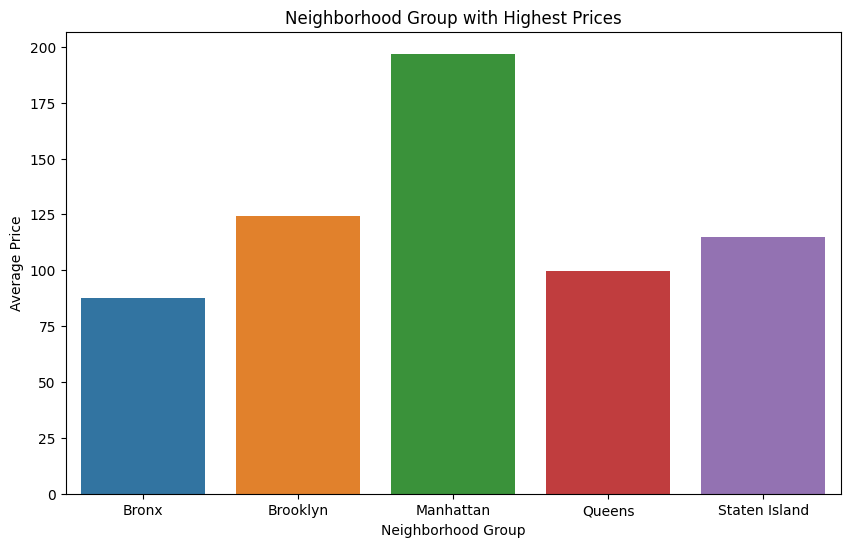

In [8]:
# Task 2: Which Neighbour Hood Group Has highest prices use bar chart to show this for all neighbourhood groups
highest_prices = df.groupby('neighbourhood_group')['price'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=highest_prices.index, y=highest_prices.values)
plt.xlabel('Neighborhood Group')
plt.ylabel('Average Price')
plt.title('Neighborhood Group with Highest Prices')
plt.show()

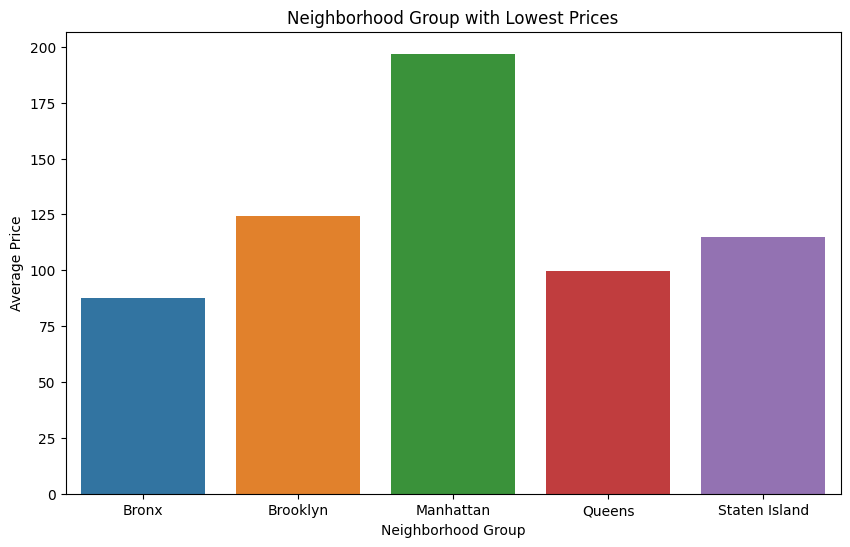

In [9]:
# Task 3:Which Neighboorhood group has lowest prices use bar chart to show this for all neighbourhood groups
lowest_prices = df.groupby('neighbourhood_group')['price'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=lowest_prices.index, y=lowest_prices.values)
plt.xlabel('Neighborhood Group')
plt.ylabel('Average Price')
plt.title('Neighborhood Group with Lowest Prices')
plt.show()

In [10]:
# Task 4: Highest and lowest price airbnb in each Neighbour Hood Group
highest_prices = df.groupby('neighbourhood_group')['price'].max()
lowest_prices = df.groupby('neighbourhood_group')['price'].min()
highest_prices


neighbourhood_group
Bronx             2500
Brooklyn         10000
Manhattan        10000
Queens           10000
Staten Island     5000
Name: price, dtype: int64

In [ ]:
lowest_prices

neighbourhood_group
Bronx             0
Brooklyn          0
Manhattan         0
Queens           10
Staten Island    13
Name: price, dtype: int64

In [12]:
# Task 5: Which Host has Highest count of properties
host_property_count = df['host_id'].value_counts()
highest_property_host = df[df['host_id'] == host_property_count.index[0]]['host_name'].values[0]

In [ ]:
host_property_count

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
            ... 
280830         1
69548489       1
18111963       1
69545387       1
68119814       1
Name: host_id, Length: 37439, dtype: int64

In [13]:
highest_property_host

'Sonder (NYC)'

In [14]:
# Task 6: Which neighbourhood is most expensive and cheapest top 10 barchart
expensive_neighborhood = df.loc[df['price'].idxmax()]['neighbourhood']
cheapest_neighborhood = df.loc[df['price'].idxmin()]['neighbourhood']

In [15]:
expensive_neighborhood

'Astoria'

In [16]:
cheapest_neighborhood

'Bedford-Stuyvesant'

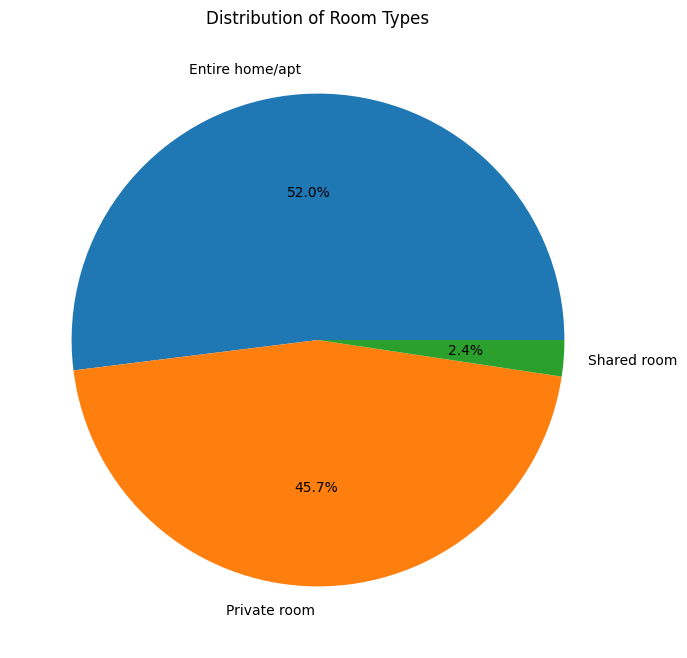

In [18]:
# Task 7: Count different type of room_type and do a pie chart showing % of each room type in overall dataset
room_type_count = df['room_type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(room_type_count, labels=room_type_count.index, autopct='%1.1f%%')
plt.title('Distribution of Room Types')
plt.show()

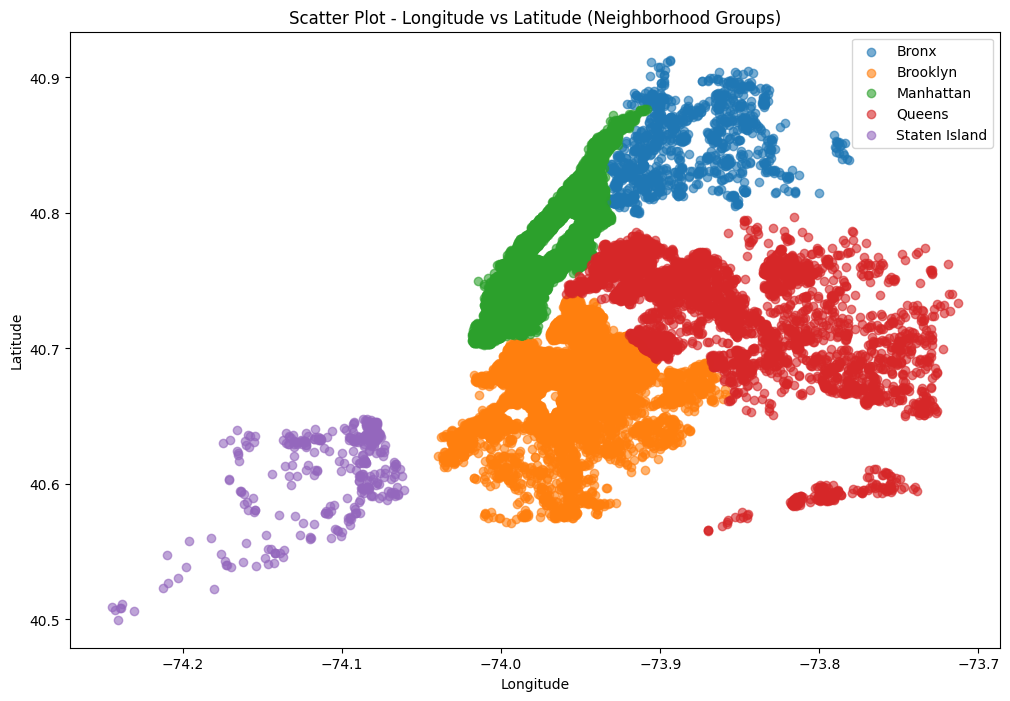

In [19]:
# Task 8: scatter plot between longitutude and latitude for different neighbourhood groups
plt.figure(figsize=(12, 8))
for group, data in df.groupby('neighbourhood_group'):
    plt.scatter(data['longitude'], data['latitude'], label=group, alpha=0.6)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot - Longitude vs Latitude (Neighborhood Groups)')
plt.legend()
plt.show()

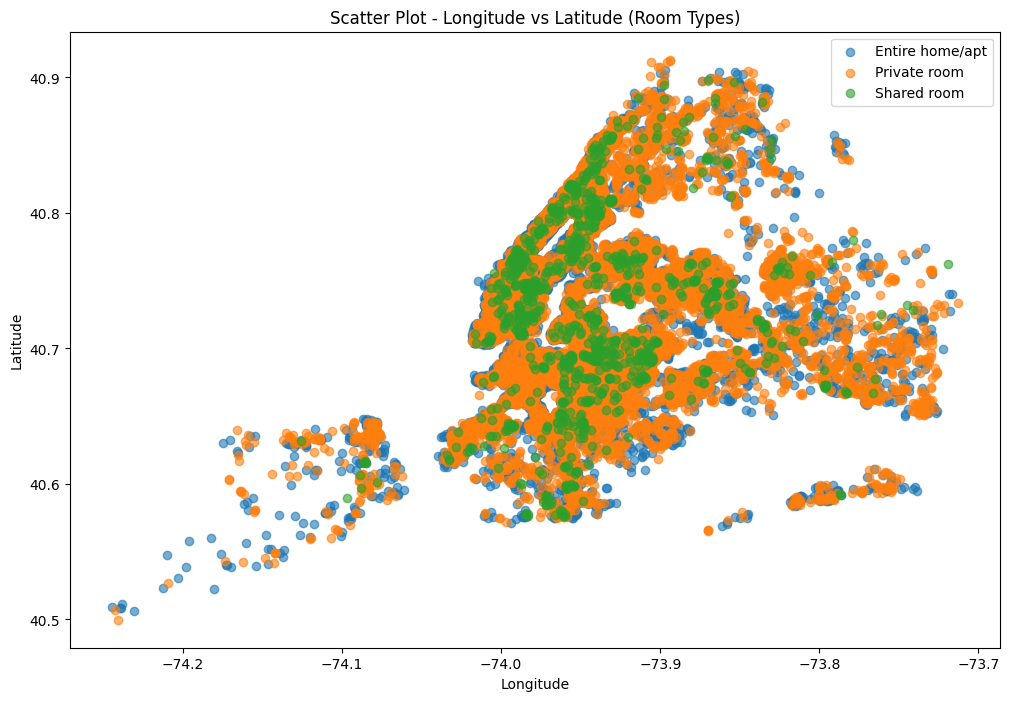

In [20]:
# Task 9: scatter plot between longitutude and latitude for different room_types
plt.figure(figsize=(12, 8))
for room_type, data in df.groupby('room_type'):
    plt.scatter(data['longitude'], data['latitude'], label=room_type, alpha=0.6)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot - Longitude vs Latitude (Room Types)')
plt.legend()
plt.show()

In [ ]:
#10


#10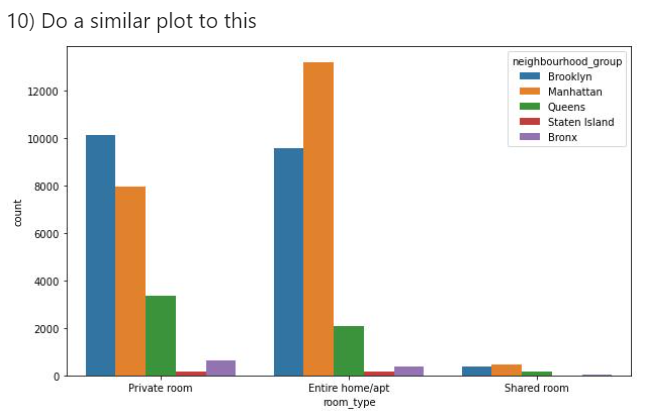

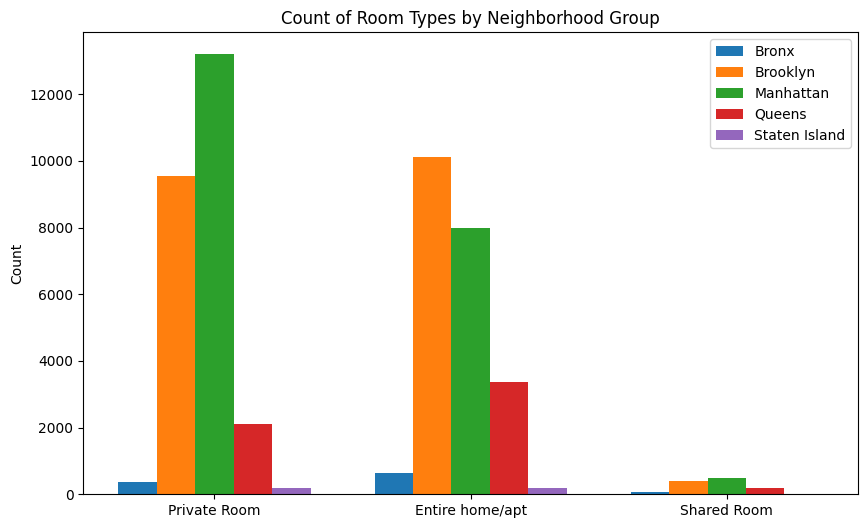

In [21]:
#10

import matplotlib.pyplot as plt
import numpy as np

# Filter the dataset for the desired neighborhood groups
filtered_df = df[df['neighbourhood_group'].isin(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'])]

# Group the filtered dataset by room type and neighborhood group
grouped_data = filtered_df.groupby(['room_type', 'neighbourhood_group']).size().unstack()

# Set the room types and neighborhood groups
room_types = ['Private Room', 'Entire home/apt', 'Shared Room']
neighborhood_groups = grouped_data.columns

# Set the values for the plot
counts = grouped_data.values

# Set the x-axis positions
x = np.arange(len(room_types))

# Set the width of each bar
width = 0.15

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate through each neighborhood group and plot the counts
for i, neighborhood_group in enumerate(neighborhood_groups):
    ax.bar(x + (i - 2) * width, counts[:, i], width, label=neighborhood_group)

# Set the x-axis tick positions and labels
ax.set_xticks(x)
ax.set_xticklabels(room_types)

# Set the y-axis label and plot title
ax.set_ylabel('Count')
ax.set_title('Count of Room Types by Neighborhood Group')

# Add a legend
ax.legend()

# Show the plot
plt.show()

In [ ]:
#Task 11:  room_type vs price bar chart for the mean and highest and lowest

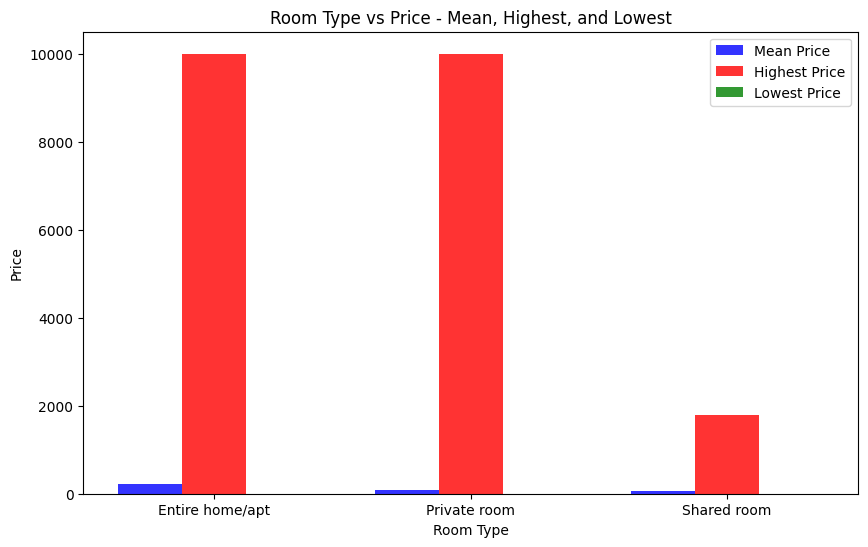

In [22]:
import matplotlib.pyplot as plt

# Calculate the mean, highest, and lowest prices for each room type
room_type_mean_prices = df.groupby('room_type')['price'].mean()
room_type_highest_prices = df.groupby('room_type')['price'].max()
room_type_lowest_prices = df.groupby('room_type')['price'].min()

# Set the room types and their corresponding positions on the x-axis
room_types = room_type_mean_prices.index
x = range(len(room_types))

# Plot the mean, highest, and lowest prices as separate bars
plt.figure(figsize=(10, 6))
bar_width = 0.25
opacity = 0.8

plt.bar(x, room_type_mean_prices, bar_width, alpha=opacity, color='b', label='Mean Price')
plt.bar([i + bar_width for i in x], room_type_highest_prices, bar_width, alpha=opacity, color='r', label='Highest Price')
plt.bar([i + 2 * bar_width for i in x], room_type_lowest_prices, bar_width, alpha=opacity, color='g', label='Lowest Price')

# Set labels and titles
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.title('Room Type vs Price - Mean, Highest, and Lowest')
plt.xticks([i + bar_width for i in x], room_types)
plt.legend()

# Show the plot
plt.show()


In [25]:
df.head()

,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,John,1,Kensington,40.64749,-73.97237,1,149,1,9,0.210000,6,365
1,2595,2845,Jennifer,2,Midtown,40.75362,-73.98377,0,225,1,45,0.380000,2,355
2,3647,4632,Elisabeth,2,Harlem,40.80902,-73.94190,1,150,3,0,1.373041,1,365
3,3831,4869,LisaRoxanne,1,Clinton Hill,40.68514,-73.95976,0,89,1,270,4.640000,1,194
4,5022,7192,Laura,2,East Harlem,40.79851,-73.94399,0,80,10,9,0.100000,1,0


In [51]:
# #before 12 last_review remove this column  (done before)
# host_name delete rows with nan  (done before)
# drop name column (done before)

# month_review fill with mean (done before)

# Others nan can also be filled nby mean or mode  (done before)

# do categorical to numerical and apply models
#Task 12: Preprocess dataset  and apply random forest decision tree svm and ann

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Task: Remove the last_review and name columns
# df = df.drop(['last_review', 'name'], axis=1)

# Task: Delete rows with NaN values in host_name
df = df.dropna(subset=['host_name'])

# Task: Fill missing values in reviews_per_month with mean
mean_reviews_per_month = df['reviews_per_month'].mean()
df['reviews_per_month'].fillna(mean_reviews_per_month, inplace=True)

# Task: Fill remaining missing values with mean or mode
df.fillna(df.mean(), inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
df['neighbourhood_group'] = label_encoder.fit_transform(df['neighbourhood_group'])

# Separate the features and target variable
X = df.drop(['price'], axis=1)
y = df['price']

# Preprocess the df
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns

numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean'))])

categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent'))])

preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features)])

X = preprocessor.fit_transform(X)

# Split the df into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Task: Apply machine learning models
# Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)
print("Random Forest RMSE:", rf_rmse)

# Decision Tree
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt_predictions = dt.predict(X_test)
dt_rmse = mean_squared_error(y_test, dt_predictions, squared=False)
print("Decision Tree RMSE:", dt_rmse)

# Support Vector Regression
svr = SVR()
svr.fit(X_train, y_train)
svr_predictions = svr.predict(X_test)
svr_rmse = mean_squared_error(y_test, svr_predictions, squared=False)
print("Support Vector Regression RMSE:", svr_rmse)


# Artificial Neural Network
ann = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000)
ann.fit(X_train, y_train)
ann_predictions = ann.predict(X_test)
ann_rmse = mean_squared_error(y_test, ann_predictions, squared=False)
print("Artificial Neural Network RMSE:", ann_rmse)

<ipython-input-52-639ce33f8800>:24: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


Random Forest RMSE: 192.99622634329387
Decision Tree RMSE: 262.50755176081657
Support Vector Regression RMSE: 204.27049968166438
Artificial Neural Network RMSE: 1451.242562374477
